<a href="https://colab.research.google.com/github/SakshamKaundal/ANN/blob/main/NumberGuess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [16]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation='softmax'))


In [17]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3)

model.save('handwritten.keras')

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8607 - loss: 0.4578
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9677 - loss: 0.1042
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9786 - loss: 0.0669


In [18]:
loss, accuracy = model.evaluate(x_test, y_test)
print(accuracy)
print(loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9654 - loss: 0.1153
0.9707000255584717
0.0986451506614685


Saving 3.png to 3.png
User uploaded file: 3.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
This digit is probably a 3


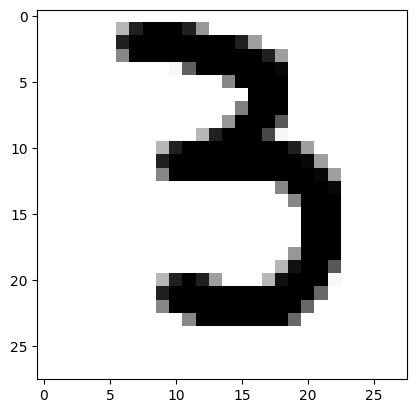

In [20]:
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt


uploaded = files.upload()


for filename in uploaded.keys():
    print(f'User uploaded file: {filename}')


    img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    img = np.invert(np.array([img]))
    img = cv2.resize(img[0], (28, 28))
    img = img.reshape(1, 28, 28, 1)
    img = img / 255.0


    prediction = model.predict(img)
    print(f"This digit is probably a {np.argmax(prediction)}")


    plt.imshow(img[0], cmap=plt.cm.binary)
    plt.show()


# New Section